In [1]:
import pandas as pd

In [2]:
pv = pd.read_csv("https://datahub.duramat.org/dataset/a49bb656-7b36-437a-8089-1870a40c2a7d/resource/d2c3fcf4-4f5f-47ad-8743-fc29f1356835/download/pvdaq_system_4_2010-2016_subset_soil_signal.csv")

In [3]:
pv.head()

,Unnamed: 0,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling,ambient_temp_nsrdb,dhi_nsrdb,dni_nsrdb,ghi_nsrdb
0,2010-02-25 14:16:00,62.464,96.55,4.017,0.564,1.0,NaN,NaN,NaN,NaN
1,2010-02-25 14:17:00,84.915,103.57,3.990,1.004,1.0,NaN,NaN,NaN,NaN
2,2010-02-25 14:18:00,94.197,108.96,3.926,1.459,1.0,NaN,NaN,NaN,NaN
3,2010-02-25 14:19:00,27.059,115.05,3.854,1.326,1.0,NaN,NaN,NaN,NaN
4,2010-02-25 14:20:00,79.618,127.72,3.792,1.899,1.0,NaN,NaN,NaN,NaN


In [4]:
pv.rename(columns={'Unnamed: 0':'timestamp'}, inplace=True)

In [5]:
# pv.to_csv("pvdaq_system_4_2010-2016_subset_soil_signal.csv", index=False)

In [6]:
# # Check rows with values for sparse columns
# pv[pv['ambient_temp_nsrdb'].notna()]

In [7]:
# Convert 'timestamp' to datetime objects
pv['timestamp'] = pd.to_datetime(pv['timestamp'])

# Identify columns with sparse data (those with significantly fewer non-null values)
sparse_cols = ['ambient_temp_nsrdb', 'dhi_nsrdb', 'dni_nsrdb', 'ghi_nsrdb']

# Replace NaN values in sparse columns with the last valid observation (forward fill)
pv[sparse_cols] = pv[sparse_cols].bfill()

# Display the first few rows to show the filled values
display(pv.head(20))

,timestamp,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling,ambient_temp_nsrdb,dhi_nsrdb,dni_nsrdb,ghi_nsrdb
0,2010-02-25 14:16:00,62.464,96.55,4.017,0.564,1.0,1.8,254.0,154.0,336.0
1,2010-02-25 14:17:00,84.915,103.57,3.990,1.004,1.0,1.8,254.0,154.0,336.0
2,2010-02-25 14:18:00,94.197,108.96,3.926,1.459,1.0,1.8,254.0,154.0,336.0
3,2010-02-25 14:19:00,27.059,115.05,3.854,1.326,1.0,1.8,254.0,154.0,336.0
4,2010-02-25 14:20:00,79.618,127.72,3.792,1.899,1.0,1.8,254.0,154.0,336.0
5,2010-02-25 14:21:00,67.463,138.12,3.733,1.122,1.0,1.8,254.0,154.0,336.0
6,2010-02-25 14:22:00,40.778,153.11,3.706,2.013,1.0,1.8,254.0,154.0,336.0
7,2010-02-25 14:23:00,169.499,169.72,3.650,1.103,1.0,1.8,254.0,154.0,336.0
8,2010-02-25 14:24:00,151.932,186.25,3.687,1.004,1.0,1.8,254.0,154.0,336.0
9,2010-02-25 14:25:00,150.478,205.38,3.628,1.283,1.0,1.8,254.0,154.0,336.0


In [8]:
pv.describe()

,timestamp,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling,ambient_temp_nsrdb,dhi_nsrdb,dni_nsrdb,ghi_nsrdb
count,1558875,1.558875e+06,1.558875e+06,1.558868e+06,1.541513e+06,1.558875e+06,1.558848e+06,1.558848e+06,1.558848e+06,1.558848e+06
mean,2013-09-16 10:31:33.114035200,3.764349e+02,4.843572e+02,1.534638e+01,1.778321e+00,9.599640e-01,1.530013e+01,1.321900e+02,5.002012e+02,4.040472e+02
min,2010-02-25 14:16:00,-9.299000e+00,-8.364000e+00,-2.530800e+01,-1.050000e-01,7.570000e-01,-2.290000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2012-02-25 12:39:30,8.358550e+01,1.378165e+02,8.329000e+00,9.440000e-01,9.430000e-01,7.200000e+00,5.300000e+01,1.090000e+02,1.580000e+02
50%,2013-09-08 06:44:00,3.170780e+02,4.082680e+02,1.599600e+01,1.510000e+00,9.760000e-01,1.570000e+01,8.400000e+01,5.010000e+02,3.690000e+02
75%,2015-05-21 07:15:30,6.678810e+02,8.329145e+02,2.301000e+01,2.331000e+00,9.910000e-01,2.370000e+01,1.790000e+02,8.850000e+02,6.140000e+02
max,2016-12-13 09:57:00,1.210800e+03,1.646610e+03,6.857100e+01,1.504700e+01,1.000000e+00,3.790000e+01,5.170000e+02,1.085000e+03,1.072000e+03
std,NaN,3.019561e+02,3.686026e+02,9.717837e+00,1.204492e+00,4.309168e-02,1.015171e+01,1.156232e+02,3.709089e+02,2.798297e+02


In [9]:
# Creating lagged features
# lag_minutes = [1,2,5,10,15,30,60,120,240,1440]
targets = ['ac_power', 'poa_irradiance', 'ambient_temp']

In [10]:
pv.columns

Index(['timestamp', 'ac_power', 'poa_irradiance', 'ambient_temp', 'wind_speed',
       'soiling', 'ambient_temp_nsrdb', 'dhi_nsrdb', 'dni_nsrdb', 'ghi_nsrdb'],
      dtype='object')

In [11]:
pv = pv.set_index('timestamp').sort_index()

In [12]:
# # Time features
# pv['hour'] = pv.index.hour
# pv['minute'] = pv.index.minute
# pv['dayofyear'] = pv.index.dayofyear

# # cyclical transforms (helps DL)
# pv['hour_sin'] = np.sin(2 * np.pi * pv['hour'] / 24.0)
# pv['hour_cos'] = np.cos(2 * np.pi * pv['hour'] / 24.0)

In [13]:
pv.columns

Index(['ac_power', 'poa_irradiance', 'ambient_temp', 'wind_speed', 'soiling',
       'ambient_temp_nsrdb', 'dhi_nsrdb', 'dni_nsrdb', 'ghi_nsrdb'],
      dtype='object')

In [14]:
# train_df = pv[pv.index.year <= 2014]
# val_df   = pv[pv.index.year == 2015]
# test_df  = pv[pv.index.year == 2016]

In [15]:
CADENCE = '10T'
pv = pv.resample(CADENCE).mean()

/tmp/ipython-input-3323841141.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pv = pv.resample(CADENCE).mean()


In [16]:
pv.head()

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling,ambient_temp_nsrdb,dhi_nsrdb,dni_nsrdb,ghi_nsrdb
timestamp,,,,,,,,,
2010-02-25 14:10:00,67.158750,106.0325,3.946750,1.08825,1.0,1.80,254.0,154.0,336.0
2010-02-25 14:20:00,114.039375,178.8475,3.613875,1.39750,1.0,1.80,254.0,154.0,336.0
2010-02-25 14:30:00,85.427800,169.8420,3.350800,0.83920,1.0,1.53,186.5,36.1,204.6
2010-02-25 14:40:00,117.902400,185.7020,3.296100,0.56040,1.0,1.50,179.0,23.0,190.0
2010-02-25 14:50:00,95.739400,185.8420,3.239300,1.05360,1.0,1.50,179.0,23.0,190.0


In [17]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)


# Four weeks of lag features
y = pv[targets]
X = make_lags(y, lags=144).fillna(0.0)

In [18]:
X.head()

y_lag_1                                 y_lag_2  \
                       ac_power poa_irradiance ambient_temp    ac_power   
timestamp                                                                 
2010-02-25 14:10:00    0.000000         0.0000     0.000000    0.000000   
2010-02-25 14:20:00   67.158750       106.0325     3.946750    0.000000   
2010-02-25 14:30:00  114.039375       178.8475     3.613875   67.158750   
2010-02-25 14:40:00   85.427800       169.8420     3.350800  114.039375   
2010-02-25 14:50:00  117.902400       185.7020     3.296100   85.427800   

                                                    y_lag_3                 \
                    poa_irradiance ambient_temp    ac_power poa_irradiance   
timestamp                                                                    
2010-02-25 14:10:00         0.0000     0.000000    0.000000         0.0000   
2010-02-25 14:20:00         0.0000     0.000000    0.000000         0.0000   
2010-02-25 14:30:00       106.0325     3.946750    0.000000         0.0000   
2010-02-25 14:40:00       178.8475     3.613875   67.158750       106.0325   
2010-02-25 14:50:00       169.8420     3.350800  114.039375       178.8475   

                                   y_lag_4  ...    y_lag_141 y_lag_142  \
                    ambient_temp  ac_power  ... ambient_temp  ac_power   
timestamp                                   ...                          
2010-02-25 14:10:00     0.000000   0.00000  ...          0.0       0.0   
2010-02-25 14:20:00     0.000000   0.00000  ...          0.0       0.0   
2010-02-25 14:30:00     0.000000   0.00000  ...          0.0       0.0   
2010-02-25 14:40:00     3.946750   0.00000  ...          0.0       0.0   
2010-02-25 14:50:00     3.613875  67.15875  ...          0.0       0.0   

                                                y_lag_143                 \
                    poa_irradiance ambient_temp  ac_power poa_irradiance   
timestamp                                                                  
2010-02-25 14:10:00            0.0          0.0       0.0            0.0   
2010-02-25 14:20:00            0.0          0.0       0.0            0.0   
2010-02-25 14:30:00            0.0          0.0       0.0            0.0   
2010-02-25 14:40:00            0.0          0.0       0.0            0.0   
2010-02-25 14:50:00            0.0          0.0       0.0            0.0   

                                 y_lag_144                              
                    ambient_temp  ac_power poa_irradiance ambient_temp  
timestamp                                                               
2010-02-25 14:10:00          0.0       0.0            0.0          0.0  
2010-02-25 14:20:00          0.0       0.0            0.0          0.0  
2010-02-25 14:30:00          0.0       0.0            0.0          0.0  
2010-02-25 14:40:00          0.0       0.0            0.0          0.0  
2010-02-25 14:50:00          0.0       0.0            0.0          0.0  

[5 rows x 432 columns]

In [19]:
def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)


# Eight-week forecast
y = make_multistep_target(y, steps=24).dropna()

In [20]:
y, X = y.align(X, join='inner', axis=0)

In [29]:
X_train, y_train = X[X.index.year <= 2015], y[y.index.year <= 2015]
# X_val, y_val =  X[X.index.year == 2015], y[y.index.year == 2015]
X_test, y_test = X[X.index.year == 2016], y[y.index.year == 2016]

In [30]:
X

y_lag_1                               y_lag_2  \
                       ac_power poa_irradiance ambient_temp  ac_power   
timestamp                                                               
2010-02-26 07:40:00    0.000000       0.000000     0.000000    0.0000   
2010-02-26 07:50:00   -2.219000     401.880000    -0.938000    0.0000   
2010-02-26 08:00:00   -0.490800     441.274000    -0.837900   -2.2190   
2010-02-26 08:10:00    1.176200     478.075000    -0.582600   -0.4908   
2010-02-26 08:20:00    3.404444     515.903333    -0.088778    1.1762   
...                         ...            ...          ...       ...   
2016-12-12 11:50:00  835.853100    1008.475800     2.534500  837.9391   
2016-12-12 12:00:00  832.488600    1006.493400     2.956100  835.8531   
2016-12-12 12:10:00  827.304800     992.844700     2.877800  832.4886   
2016-12-12 12:20:00  839.826100    1003.789300     3.153000  827.3048   
2016-12-12 12:30:00  832.780300     996.393900     3.274200  839.8261   

                                                  y_lag_3                 \
                    poa_irradiance ambient_temp  ac_power poa_irradiance   
timestamp                                                                  
2010-02-26 07:40:00         0.0000       0.0000    0.0000         0.0000   
2010-02-26 07:50:00         0.0000       0.0000    0.0000         0.0000   
2010-02-26 08:00:00       401.8800      -0.9380    0.0000         0.0000   
2010-02-26 08:10:00       441.2740      -0.8379   -2.2190       401.8800   
2010-02-26 08:20:00       478.0750      -0.5826   -0.4908       441.2740   
...                            ...          ...       ...            ...   
2016-12-12 11:50:00      1013.3782       2.2739  838.5604      1015.6664   
2016-12-12 12:00:00      1008.4758       2.5345  837.9391      1013.3782   
2016-12-12 12:10:00      1006.4934       2.9561  835.8531      1008.4758   
2016-12-12 12:20:00       992.8447       2.8778  832.4886      1006.4934   
2016-12-12 12:30:00      1003.7893       3.1530  827.3048       992.8447   

                                   y_lag_4  ...    y_lag_141 y_lag_142  \
                    ambient_temp  ac_power  ... ambient_temp  ac_power   
timestamp                                   ...                          
2010-02-26 07:40:00       0.0000    0.0000  ...       0.0000    0.0000   
2010-02-26 07:50:00       0.0000    0.0000  ...       0.0000    0.0000   
2010-02-26 08:00:00       0.0000    0.0000  ...       0.0000    0.0000   
2010-02-26 08:10:00      -0.9380    0.0000  ...       0.0000    0.0000   
2010-02-26 08:20:00      -0.8379   -2.2190  ...       0.0000    0.0000   
...                          ...       ...  ...          ...       ...   
2016-12-12 11:50:00       2.1984  835.3302  ...       1.2365  272.8175   
2016-12-12 12:00:00       2.2739  838.5604  ...       1.3252  118.8115   
2016-12-12 12:10:00       2.5345  837.9391  ...       2.0950  308.1469   
2016-12-12 12:20:00       2.9561  835.8531  ...       2.7447  721.1854   
2016-12-12 12:30:00       2.8778  832.4886  ...       2.8841  313.7875   

                                                y_lag_143                 \
                    poa_irradiance ambient_temp  ac_power poa_irradiance   
timestamp                                                                  
2010-02-26 07:40:00         0.0000       0.0000    0.0000         0.0000   
2010-02-26 07:50:00         0.0000       0.0000    0.0000         0.0000   
2010-02-26 08:00:00         0.0000       0.0000    0.0000         0.0000   
2010-02-26 08:10:00         0.0000       0.0000    0.0000         0.0000   
2010-02-26 08:20:00         0.0000       0.0000    0.0000         0.0000   
...                            ...          ...       ...            ...   
2016-12-12 11:50:00       328.3317       1.3125  423.7447       492.1532   
2016-12-12 12:00:00       151.1166       1.2365  272.8175       328.3317   
2016-12-12 12:10:00       358.9619       1.3252  118.8115      

In [31]:
y

y_step_1                                y_step_2  \
                       ac_power poa_irradiance ambient_temp    ac_power   
timestamp                                                                 
2010-02-26 07:40:00   -2.219000     401.880000    -0.938000   -0.490800   
2010-02-26 07:50:00   -0.490800     441.274000    -0.837900    1.176200   
2010-02-26 08:00:00    1.176200     478.075000    -0.582600    3.404444   
2010-02-26 08:10:00    3.404444     515.903333    -0.088778    4.934700   
2010-02-26 08:20:00    4.934700     516.636000     0.627100   12.786900   
...                         ...            ...          ...         ...   
2016-12-12 11:50:00  832.488600    1006.493400     2.956100  827.304800   
2016-12-12 12:00:00  827.304800     992.844700     2.877800  839.826100   
2016-12-12 12:10:00  839.826100    1003.789300     3.153000  832.780300   
2016-12-12 12:20:00  832.780300     996.393900     3.274200  821.580000   
2016-12-12 12:30:00  821.580000     981.409100     3.581400  764.367400   

                                                   y_step_3                 \
                    poa_irradiance ambient_temp    ac_power poa_irradiance   
timestamp                                                                    
2010-02-26 07:40:00     441.274000    -0.837900    1.176200     478.075000   
2010-02-26 07:50:00     478.075000    -0.582600    3.404444     515.903333   
2010-02-26 08:00:00     515.903333    -0.088778    4.934700     516.636000   
2010-02-26 08:10:00     516.636000     0.627100   12.786900     535.521000   
2010-02-26 08:20:00     535.521000     1.051000   15.229625     602.186250   
...                            ...          ...         ...            ...   
2016-12-12 11:50:00     992.844700     2.877800  839.826100    1003.789300   
2016-12-12 12:00:00    1003.789300     3.153000  832.780300     996.393900   
2016-12-12 12:10:00     996.393900     3.274200  821.580000     981.409100   
2016-12-12 12:20:00     981.409100     3.581400  764.367400     911.396900   
2016-12-12 12:30:00     911.396900     3.586300  814.895300     963.663800   

                                    y_step_4  ...    y_step_21 y_step_22  \
                    ambient_temp    ac_power  ... ambient_temp  ac_power   
timestamp                                     ...                          
2010-02-26 07:40:00    -0.582600    3.404444  ...       4.6035  713.7715   
2010-02-26 07:50:00    -0.088778    4.934700  ...       4.8207  624.7511   
2010-02-26 08:00:00     0.627100   12.786900  ...       4.7675  694.8259   
2010-02-26 08:10:00     1.051000   15.229625  ...       4.6442  633.7618   
2010-02-26 08:20:00     1.262125   18.537400  ...       4.8110  853.7624   
...                          ...         ...  ...          ...       ...   
2016-12-12 11:50:00     3.153000  832.780300  ...       3.7261  190.5850   
2016-12-12 12:00:00     3.274200  821.580000  ...       3.7128  187.4273   
2016-12-12 12:10:00     3.581400  764.367400  ...       3.5900  185.4963   
2016-12-12 12:20:00     3.586300  814.895300  ...       3.5930   66.4485   
2016-12-12 12:30:00     3.572700  793.680400  ...       3.6108   18.1099   

                                                y_step_23                 \
                    poa_irradiance ambient_temp  ac_power poa_irradiance   
timestamp                                                                  
2010-02-26 07:40:00      1140.8630       4.8207  624.7511      1152.1420   
2010-02-26 07:50:00      1152.1420       4.7675  694.8259      1160.7680   
2010-02-26 08:00:00      1160.7680       4.6442  633.7618      1172.2750   
2010-02-26 08:10:00      1172.2750       4.8110  853.7624      1178.9460   
2010-02-26 08:20:00      1178.9460       5.3584  694.9794      1181.3670   
...                            ...          ...       ...            ...   
2016-12-12 11:50:00       229.6292       3.7128  187.4273       220.9579   
2016-12-12 12:00:00       220.9579       3.5900  185.4

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import RegressorChain


# YOUR CODE HERE
model = RegressorChain(XGBRegressor(objective= "reg:squarederror",
                                    learning_rate= 0.03,       # start here; lower if you see instability
                                    n_estimators= 100,        # use early stopping to truncate
                                    max_depth= 6,
                                    min_child_weight= 4,
                                    subsample= 0.8,
                                    colsample_bytree= 0.8,
                                    gamma= 0.0,
                                    reg_alpha= 0.0,
                                    reg_lambda= 1.0,
                                    verbosity= 1,
                                    random_state= 42,
                                    tree_method= "hist"        # 'gpu_hist' if you have a GPU))
                                    ))

In [33]:
model.fit(X_train, y_train, verbose = True)


RegressorChain(base_estimator=XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=0.0,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.03, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=6,
                                           max_leaves=None, min_child_weight=4,
                                           missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None, ...))

In [35]:
y_pred = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
).clip(0.0)

In [36]:
y_pred.head(24)

y_step_1                                y_step_2  \
                       ac_power poa_irradiance ambient_temp    ac_power   
timestamp                                                                 
2016-01-01 07:20:00   34.279564     112.246002     0.000000  100.286186   
2016-01-01 07:30:00   71.684471     157.381042     0.000000  137.458069   
2016-01-01 07:40:00  139.698166     230.026306     0.000000  197.448792   
2016-01-01 07:50:00  196.529739     280.348083     0.000000  250.724487   
2016-01-01 08:00:00  275.754700     358.847107     0.000000  316.350220   
2016-01-01 08:10:00  340.819366     421.273376     0.000000  372.006775   
2016-01-01 08:20:00  390.636597     474.024506     0.000000  428.769226   
2016-01-01 08:30:00  433.138458     522.385132     0.000000  464.330994   
2016-01-01 08:40:00  486.728424     585.589172     0.000000  513.227539   
2016-01-01 08:50:00  525.711731     624.833130     0.000000  542.539917   
2016-01-01 09:00:00  550.583557     650.038452     0.000000  567.798584   
2016-01-01 09:10:00  585.546631     695.037903     0.000000  598.402649   
2016-01-01 09:20:00  621.445679     732.186584     0.000000  629.074463   
2016-01-01 09:30:00  646.654053     763.996704     0.000000  653.697449   
2016-01-01 09:40:00  671.073914     802.766296     0.000000  680.586670   
2016-01-01 09:50:00  689.645874     824.376160     0.000000  691.126770   
2016-01-01 10:00:00  715.894958     855.070007     0.374541  714.626160   
2016-01-01 10:10:00  729.182434     875.595459     0.409239  733.466858   
2016-01-01 10:20:00  752.989624     905.415710     1.456872  751.096497   
2016-01-01 10:30:00  762.605652     918.878174     1.774910  758.983276   
2016-01-01 10:40:00  779.263855     933.084229     1.870251  770.615784   
2016-01-01 10:50:00  789.318420     948.857666     1.870251  782.561218   
2016-01-01 11:00:00  804.604492     967.183472     1.870251  794.137329   
2016-01-01 11:10:00  815.329407     978.593872     1.051246  799.608337   

                                                   y_step_3                 \
                    poa_irradiance ambient_temp    ac_power poa_irradiance   
timestamp                                                                    
2016-01-01 07:20:00     190.784683     0.478820  174.947479     262.929718   
2016-01-01 07:30:00     226.193695     0.000000  198.286346     279.603180   
2016-01-01 07:40:00     280.740509     0.000000  250.693436     343.192383   
2016-01-01 07:50:00     340.636017     0.000000  301.018097     388.929443   
2016-01-01 08:00:00     399.284149     0.000000  348.365204     432.490326   
2016-01-01 08:10:00     452.505157     0.000000  409.729889     497.234985   
2016-01-01 08:20:00     515.083008     0.000000  462.127502     553.260498   
2016-01-01 08:30:00     555.590515     0.000000  492.584595     592.257874   
2016-01-01 08:40:00     617.493225     0.000000  530.652161     634.654358   
2016-01-01 08:50:00     641.634521     0.000000  557.929993     669.007751   
2016-01-01 09:00:00     676.826355     0.000000  585.528259     695.050049   
2016-01-01 09:10:00     710.003418     0.000000  617.849548     729.669495   
2016-01-01 09:20:00     745.206787     0.000000  640.128052     763.315186   
2016-01-01 09:30:00     772.820068     0.000000  658.170898     784.683228   
2016-01-01 09:40:00     812.382080     0.000000  686.098755     820.494446   
2016-01-01 09:50:00     823.370117     0.246231  695.980347     832.730530   
2016-01-01 10:00:00     850.560303     1.125419  718.253662     857.210999   
2016-01-01 10:10:00     868.600159     1.125419  730.389282     870.385193   
2016-01-01 10:20:00     896.003906     2.213905  744.524719     893.011780   
2016-01-01 10:30:00     907.257690     2.697640  756.615723     906.565613   
2016-01-01 10:40:00     921.992920     2.697640  764.582581     913.060547   
2016-01-01 10:50:00     932.098816     2.697640  776.632385     922.998169   
2016-01-01 11:00:00     948.454163     2.697640

In [37]:
y_test.head(24)

y_step_1                              y_step_2  \
                     ac_power poa_irradiance ambient_temp  ac_power   
timestamp                                                             
2016-01-01 07:20:00   27.2366        78.3628     -11.6216   68.9346   
2016-01-01 07:30:00   68.9346       151.6692     -11.2173  131.5558   
2016-01-01 07:40:00  131.5558       224.7981     -11.5668  229.8918   
2016-01-01 07:50:00  229.8918       293.0270     -11.7171  304.0657   
2016-01-01 08:00:00  304.0657       360.0161      -9.2537  355.9654   
2016-01-01 08:10:00  355.9654       422.0913      -7.4047  408.3250   
2016-01-01 08:20:00  408.3250       479.8493      -6.4282  455.9528   
2016-01-01 08:30:00  455.9528       534.8308      -5.7167  499.5966   
2016-01-01 08:40:00  499.5966       585.2441      -5.0880  539.3317   
2016-01-01 08:50:00  539.3317       631.8207      -4.5316  575.1335   
2016-01-01 09:00:00  575.1335       676.9749      -3.8299  609.2782   
2016-01-01 09:10:00  609.2782       720.1772      -3.4859  640.5539   
2016-01-01 09:20:00  640.5539       759.5711      -2.8576  667.6523   
2016-01-01 09:30:00  667.6523       797.4255      -2.3149  691.5308   
2016-01-01 09:40:00  691.5308       833.4501      -1.5137  712.8301   
2016-01-01 09:50:00  712.8301       865.5857      -0.5812  734.5492   
2016-01-01 10:00:00  734.5492       895.9251      -0.3398  754.5218   
2016-01-01 10:10:00  754.5218       924.5960       0.1491  770.6745   
2016-01-01 10:20:00  770.6745       948.9091       0.6584  788.2972   
2016-01-01 10:30:00  788.2972       973.8430       0.4736  804.2255   
2016-01-01 10:40:00  804.2255       994.9074       0.4541  819.9034   
2016-01-01 10:50:00  819.9034      1013.4563       0.3031  835.7680   
2016-01-01 11:00:00  835.7680      1028.4826      -0.1437  847.2603   
2016-01-01 11:10:00  847.2603      1040.4754      -0.4756  854.1786   

                                                 y_step_3                 \
                    poa_irradiance ambient_temp  ac_power poa_irradiance   
timestamp                                                                  
2016-01-01 07:20:00       151.6692     -11.2173  131.5558       224.7981   
2016-01-01 07:30:00       224.7981     -11.5668  229.8918       293.0270   
2016-01-01 07:40:00       293.0270     -11.7171  304.0657       360.0161   
2016-01-01 07:50:00       360.0161      -9.2537  355.9654       422.0913   
2016-01-01 08:00:00       422.0913      -7.4047  408.3250       479.8493   
2016-01-01 08:10:00       479.8493      -6.4282  455.9528       534.8308   
2016-01-01 08:20:00       534.8308      -5.7167  499.5966       585.2441   
2016-01-01 08:30:00       585.2441      -5.0880  539.3317       631.8207   
2016-01-01 08:40:00       631.8207      -4.5316  575.1335       676.9749   
2016-01-01 08:50:00       676.9749      -3.8299  609.2782       720.1772   
2016-01-01 09:00:00       720.1772      -3.4859  640.5539       759.5711   
2016-01-01 09:10:00       759.5711      -2.8576  667.6523       797.4255   
2016-01-01 09:20:00       797.4255      -2.3149  691.5308       833.4501   
2016-01-01 09:30:00       833.4501      -1.5137  712.8301       865.5857   
2016-01-01 09:40:00       865.5857      -0.5812  734.5492       895.9251   
2016-01-01 09:50:00       895.9251      -0.3398  754.5218       924.5960   
2016-01-01 10:00:00       924.5960       0.1491  770.6745       948.9091   
2016-01-01 10:10:00       948.9091       0.6584  788.2972       973.8430   
2016-01-01 10:20:00       973.8430       0.4736  804.2255       994.9074   
2016-01-01 10:30:00       994.9074       0.4541  819.9034      1013.4563   
2016-01-01 10:40:00      1013.4563       0.3031  835.7680      1028.4826   
2016-01-01 10:50:00      1028.4826      -0.1437  847.2603      1040.4754   
2016-01-01 11:00:00      1040.4754      -0.4756  854.1786      1051.8205   
2016-01-01 11:10:00      1051.8205      -0.1271  855.0203      1058.8834   

                                  y_step_4  ...   

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------- utilities to find columns (works with MultiIndex or flat names) ----------
def is_multiindex(df):
    return isinstance(df.columns, pd.MultiIndex)

def find_col(df, step, target):
    """Return the column key for step (1-based) and target name."""
    if is_multiindex(df):
        lvl0 = f"y_step_{step}"
        if (lvl0, target) in df.columns:
            return (lvl0, target)
        # flexible search
        for c in df.columns:
            if str(step) in str(c[0]) and target in str(c[1]):
                return c
        raise KeyError(f"Could not find MultiIndex column for step {step}, target {target}")
    else:
        # flat column candidates
        candidates = [
            f"y_step_{step}_{target}",
            f"y_step_{step}.{target}",
            f"y_step_{step} {target}",
            f"{target}_step_{step}",
            f"{target}_t{step}",
        ]
        for cand in candidates:
            if cand in df.columns:
                return cand
        # fallback: search for substrings
        for c in df.columns:
            if f"step_{step}" in c and target in c:
                return c
            if f"y_step_{step}" in c and target in c:
                return c
        raise KeyError(f"Could not find flat column for step {step}, target {target}")


In [39]:
# ---------- extraction functions ----------
def get_predicted_sequence_row(y_pred, timestamp, target='ac_power', steps=10):
    """Return numpy array length steps: predicted values at a single forecast origin timestamp."""
    vals = []
    for s in range(1, steps+1):
        col = find_col(y_pred, s, target)
        vals.append(y_pred.loc[timestamp, col])
    return np.array(vals)



In [40]:
def get_actual_successive_values(y_val, timestamp, target='ac_power', steps=10):
    """
    Return the actual successive observations starting at timestamp:
    takes y_val[y_step_1, target] for rows timestamp, timestamp_next, ... for steps rows.
    """
    # column containing the "true at lead=1" for each forecast origin
    col_step1 = find_col(y_val, 1, target)
    # find positional index (int) of timestamp within y_val.index
    if timestamp not in y_val.index:
        raise KeyError(f"Timestamp {timestamp} not found in y_val.index")
    start_pos = y_val.index.get_loc(timestamp)
    end_pos = start_pos + steps
    if end_pos > len(y_val):
        raise IndexError(f"Not enough rows after {timestamp} to extract {steps} successive actuals (need {end_pos}, have {len(y_val)})")
    series = y_val.iloc[start_pos:end_pos][col_step1]  # length = steps
    return series.values, series.index  # return also the timestamps for reference



In [41]:
# ---------- plotting / comparison ----------
def compare_pred_vs_actual_with_time_labels(
    y_pred,
    y_val,
    timestamp=None,
    target='ac_power',
    steps=10,
    step_minutes=10,
    figsize=(10,4)
):
    """
    Compare predicted 1..steps (row at timestamp in y_pred) to actual successive observations
    (rows timestamp..timestamp+steps-1 of y_val['y_step_1', target]) and plot using datetime labels
    spaced by `step_minutes` minutes.
    """
    if timestamp is None:
        timestamp = y_pred.index[0]
    # ensure timestamp exists
    if timestamp not in y_pred.index:
        raise KeyError(f"Timestamp {timestamp} not found in y_pred.index")
    if timestamp not in y_val.index:
        raise KeyError(f"Timestamp {timestamp} not found in y_val.index")

    # Predicted sequence (row for timestamp)
    pred = []
    for s in range(1, steps+1):
        cpred = find_col(y_pred, s, target)
        pred.append(y_pred.loc[timestamp, cpred])
    pred = np.array(pred)

    # Actual successive values: use y_step_1 column from y_val for successive rows
    actual_col = find_col(y_val, 1, target)
    start_pos = y_val.index.get_loc(timestamp)
    end_pos = start_pos + steps
    if end_pos > len(y_val):
        raise IndexError(f"Not enough rows after {timestamp} to extract {steps} actuals.")
    actual_series = y_val.iloc[start_pos:end_pos][actual_col]
    actual = actual_series.values
    actual_times = actual_series.index.to_numpy()

    # Predicted times: timestamp + k*step_minutes
    t0 = pd.to_datetime(timestamp)
    pred_times = np.array([t0 + pd.Timedelta(minutes=10 * k) for k in range(steps)])

    # If actual_times align with pred_times, great. Otherwise we still label with pred_times to show lead times.
    # Plot sequence vs real timestamps
    plt.figure(figsize=figsize)
    plt.plot(pred_times, actual, marker='o', label='Actual (successive observations)', linewidth=2)
    plt.plot(pred_times, pred, marker='x', label='Predicted (forecast at origin)', linewidth=2)
    plt.xlabel('Timestamp (lead)')
    plt.ylabel(target)
    plt.title(f'Predicted vs Actual for origin {t0} (step={round(step_minutes*(1/6), 2)}hrs).')
    plt.legend()
    plt.grid(True)

    # format x-axis nicely
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Scatter predicted vs actual (one point per lead)
    plt.figure(figsize=(5,5))
    plt.scatter(pred, actual, s=90)
    vmin = min(pred.min(), actual.min())
    vmax = max(pred.max(), actual.max())
    plt.plot([vmin, vmax], [vmin, vmax], 'k--', alpha=0.7)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Predicted vs Actual (each point = one lead)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [42]:
import matplotlib.dates as mdates


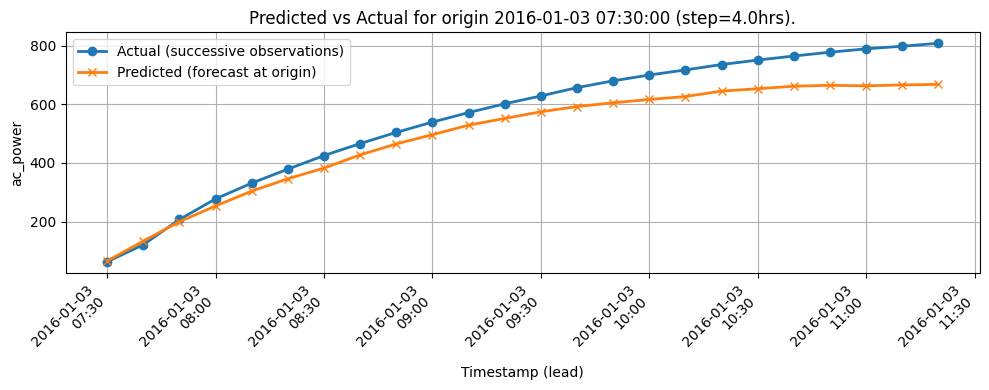

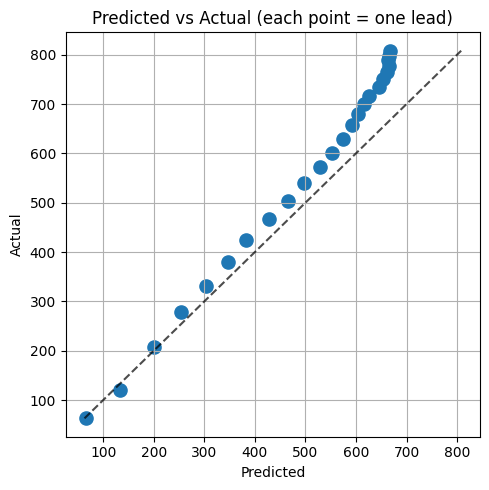

In [61]:
# ---------------- Example usage ----------------
timestamp =  y_pred.index[66] #'2015-01-01 07:20:00'  # or y_pred.index[0]
df_comparison = compare_pred_vs_actual_with_time_labels(y_pred, y_test, timestamp=timestamp, target='ac_power',
                                                                                    steps=24, step_minutes=24)


In [63]:
y_fit = pd.DataFrame(
    model.predict(X_train),
    index=y_train.index,
    columns=y_train.columns,
).clip(0.0)

In [116]:
y_pred_test = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
).clip(0.0)

In [111]:
import seaborn as sns

# Set Matplotlib defaults
# plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

In [66]:
from math import sqrt

In [71]:
y_train

y_step_1                                y_step_2  \
                       ac_power poa_irradiance ambient_temp    ac_power   
timestamp                                                                 
2010-02-26 07:40:00   -2.219000     401.880000    -0.938000   -0.490800   
2010-02-26 07:50:00   -0.490800     441.274000    -0.837900    1.176200   
2010-02-26 08:00:00    1.176200     478.075000    -0.582600    3.404444   
2010-02-26 08:10:00    3.404444     515.903333    -0.088778    4.934700   
2010-02-26 08:20:00    4.934700     516.636000     0.627100   12.786900   
...                         ...            ...          ...         ...   
2015-12-31 12:00:00  681.898900     806.796400    -4.372600  705.407100   
2015-12-31 12:10:00  705.407100     841.545600    -4.295100  782.825900   
2015-12-31 12:20:00  782.825900     935.526700    -3.949800  883.679800   
2015-12-31 12:30:00  883.679800    1055.586600    -3.841400  857.415500   
2015-12-31 12:40:00  857.415500    1024.149700    -3.983500  881.533400   

                                                   y_step_3                 \
                    poa_irradiance ambient_temp    ac_power poa_irradiance   
timestamp                                                                    
2010-02-26 07:40:00     441.274000    -0.837900    1.176200     478.075000   
2010-02-26 07:50:00     478.075000    -0.582600    3.404444     515.903333   
2010-02-26 08:00:00     515.903333    -0.088778    4.934700     516.636000   
2010-02-26 08:10:00     516.636000     0.627100   12.786900     535.521000   
2010-02-26 08:20:00     535.521000     1.051000   15.229625     602.186250   
...                            ...          ...         ...            ...   
2015-12-31 12:00:00     841.545600    -4.295100  782.825900     935.526700   
2015-12-31 12:10:00     935.526700    -3.949800  883.679800    1055.586600   
2015-12-31 12:20:00    1055.586600    -3.841400  857.415500    1024.149700   
2015-12-31 12:30:00    1024.149700    -3.983500  881.533400    1065.002800   
2015-12-31 12:40:00    1065.002800    -4.034700  864.128100    1029.063300   

                                    y_step_4  ...    y_step_21 y_step_22  \
                    ambient_temp    ac_power  ... ambient_temp  ac_power   
timestamp                                     ...                          
2010-02-26 07:40:00    -0.582600    3.404444  ...       4.6035  713.7715   
2010-02-26 07:50:00    -0.088778    4.934700  ...       4.8207  624.7511   
2010-02-26 08:00:00     0.627100   12.786900  ...       4.7675  694.8259   
2010-02-26 08:10:00     1.051000   15.229625  ...       4.6442  633.7618   
2010-02-26 08:20:00     1.262125   18.537400  ...       4.8110  853.7624   
...                          ...         ...  ...          ...       ...   
2015-12-31 12:00:00    -3.949800  883.679800  ...      -4.1976  218.7383   
2015-12-31 12:10:00    -3.841400  857.415500  ...      -4.2068  110.6881   
2015-12-31 12:20:00    -3.983500  881.533400  ...      -4.4330   81.8301   
2015-12-31 12:30:00    -4.034700  864.128100  ...      -4.6882   37.3096   
2015-12-31 12:40:00    -4.078700  822.444000  ...      -4.9035   15.8879   

                                                y_step_23                 \
                    poa_irradiance ambient_temp  ac_power poa_irradiance   
timestamp                                                                  
2010-02-26 07:40:00      1140.8630       4.8207  624.7511      1152.1420   
2010-02-26 07:50:00      1152.1420       4.7675  694.8259      1160.7680   
2010-02-26 08:00:00      1160.7680       4.6442  633.7618      1172.2750   
2010-02-26 08:10:00      1172.2750       4.8110  853.7624      1178.9460   
2010-02-26 08:20:00      1178.9460       5.3584  694.9794      1181.3670   
...                            ...          ...       ...            ...   
2015-12-31 12:00:00       261.8189      -4.2068  110.6881       141.1171   
2015-12-31 12:10:00       141.1171      -4.4330   81.8

In [72]:
train_rmse = mean_squared_error(y_train, y_fit)
test_rmse = mean_squared_error(y_test, y_pred)

print((f"Train RMSE: {sqrt(train_rmse):.2f}\n" f"Test RMSE: {sqrt(test_rmse):.2f}"))

Train RMSE: 191.03
Test RMSE: 184.00


In [76]:
df_ac_train = y_train.xs('ac_power', axis=1, level=1)   # picks level1 == 'ac_power'
df_ac_test = y_test.xs('ac_power', axis=1, level=1)
df_ac_pred_train = y_fit.xs('ac_power', axis=1, level=1)
df_ac_pred_test = y_pred.xs('ac_power', axis=1, level=1)
# df_ac columns will be the level0 names: 'y_step_1', 'y_step_2', ...

df_poa_train = y_train.xs('poa_irradiance', axis=1, level=1)   # picks level1 == 'ac_power'
df_poa_test = y_test.xs('poa_irradiance', axis=1, level=1)
df_poa_pred_train = y_fit.xs('poa_irradiance', axis=1, level=1)
df_poa_pred_test = y_pred.xs('poa_irradiance', axis=1, level=1)

df_temp_train = y_train.xs('ambient_temp', axis=1, level=1)   # picks level1 == 'ac_power'
df_temp_test = y_test.xs('ambient_temp', axis=1, level=1)
df_temp_pred_train = y_fit.xs('ambient_temp', axis=1, level=1)
df_temp_pred_test = y_pred.xs('ambient_temp', axis=1, level=1)

In [77]:
train_rmse_ac = mean_squared_error(df_ac_train, df_ac_pred_train)
test_rmse_ac = mean_squared_error(df_ac_test, df_ac_pred_test)

train_rmse_poa = mean_squared_error(df_poa_train, df_poa_pred_train)
test_rmse_poa = mean_squared_error(df_poa_test, df_poa_pred_test)

train_rmse_temp = mean_squared_error(df_temp_train, df_temp_pred_train)
test_rmse_temp = mean_squared_error(df_temp_test, df_temp_pred_test)

print("AC Power")
print((f"Train RMSE: {sqrt(train_rmse_ac):.2f}\n" f"Test RMSE: {sqrt(test_rmse_ac):.2f}"))
print()

print("POA Irradiance")
print((f"Train RMSE: {sqrt(train_rmse_poa):.2f}\n" f"Test RMSE: {sqrt(test_rmse_poa):.2f}"))
print()

print("Ambient Temperature")
print((f"Train RMSE: {sqrt(train_rmse_temp):.2f}\n" f"Test RMSE: {sqrt(test_rmse_temp):.2f}"))


AC Power
Train RMSE: 207.95
Test RMSE: 196.79

POA Irradiance
Train RMSE: 257.33
Test RMSE: 250.66

Ambient Temperature
Train RMSE: 4.30
Test RMSE: 3.96
